# Spark

In [1]:
%pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext

In [5]:
# !pip3 install findspark
%pip install findspark

  Using cached findspark-2.0.1-py2.py3-none-any.whl.metadata (352 bytes)
Using cached findspark-2.0.1-py2.py3-none-any.whl (4.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import findspark
findspark.init()

In [7]:
sc = pyspark.SparkContext()
spark = SparkSession.builder.getOrCreate()
spark

In [8]:
sc._conf.getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.startTime', '1744832504769'),
 ('spark.driver.port', '52633'),
 ('spark.executor.id', 'dri

In [9]:
Empleado = Row("primerNombre","apellido","mail","sueldo")
empleado1 = Empleado("Juan","Perez","juanperez@gmail.com",10000)
empleado2 = Empleado("Pedro","Ramirez","pram@gmail.com",20000)
empleado3 = Empleado("Pablo","Corrado","pcors@gmail.com",30000)
empleado4 = Empleado("Jorge","Mendoza","jmen@gmail.com",5000)
empleado5 = Empleado("Edson","Uribe","euri@gmail.com",2000)
print(empleado2)

Row(primerNombre='Pedro', apellido='Ramirez', mail='pram@gmail.com', sueldo=20000)


In [11]:
print("El nombre del empleado 1 es", format(empleado1[0]))
print("El sueldo del empleado 5 es", format(empleado5.sueldo))

El nombre del empleado 1 es Juan
El sueldo del empleado 5 es 2000


In [12]:
area1=Row(id='123456',name='RH')
area2=Row(id='789101',name='OPS')
area3=Row(id='111213',name='FN')
area4=Row(id='141516',name='MN')

In [13]:
areaconempleado1 = Row(area=area1, empleados=[empleado1,empleado2,empleado5])
areaconempleado2 = Row(area=area2, empleados=[empleado3,empleado4])
areaconempleado3 = Row(area=area3, empleados=[empleado1,empleado4,empleado3])
areaconempleado4 = Row(area=area4, empleados=[empleado2,empleado3])

print(areaconempleado2)

Row(area=Row(id='789101', name='OPS'), empleados=[Row(primerNombre='Pablo', apellido='Corrado', mail='pcors@gmail.com', sueldo=30000), Row(primerNombre='Jorge', apellido='Mendoza', mail='jmen@gmail.com', sueldo=5000)])


Este error ocurre porque el proceso de Python que Spark usa para ejecutar el código se cerró inesperadamente. Las causas más comunes son:

### Incompatibilidad de versiones

- **PySpark no es compatible con Python 3.13** (que es el que tienes instalado).
- **PySpark funciona bien con Python 3.7, 3.8, 3.9, 3.10 y 3.11.**

In [ ]:
# Creamos una lista de filas (Rows) que representan áreas con sus respectivos empleados
areasconempleados = [areaconempleado1, areaconempleado2, areaconempleado3, areaconempleado4]

# Convertimos la lista de Rows en un DataFrame de Spark
# Cada fila del DataFrame contendrá información sobre un área y los empleados asociados a ella
df = spark.createDataFrame(areasconempleados)

# Mostramos las primeras 2 filas del DataFrame sin truncar los valores
# Esto nos permite visualizar el contenido completo de las columnas
df.show(n=2, truncate=False)

+-------------+--------------------------------------------------------------------------------------------------------------------------+
|area         |empleados                                                                                                                 |
+-------------+--------------------------------------------------------------------------------------------------------------------------+
|{123456, RH} |[{Juan, Perez, juanperez@gmail.com, 10000}, {Pedro, Ramirez, pram@gmail.com, 20000}, {Edson, Uribe, euri@gmail.com, 2000}]|
|{789101, OPS}|[{Pablo, Corrado, pcors@gmail.com, 30000}, {Jorge, Mendoza, jmen@gmail.com, 5000}]                                        |
+-------------+--------------------------------------------------------------------------------------------------------------------------+
only showing top 2 rows



### Carga de datos de FIFA 2020

En esta sección, se carga un archivo comprimido en formato CSV que contiene información sobre jugadores de FIFA 2020. El archivo se llama `fifa-players-2020.csv.bz2` y se utiliza PySpark para leerlo y convertirlo en un DataFrame.

#### Código:
```python
fifa_file = "fifa-players-2020.csv.bz2"
fifa_df = spark.read.load(fifa_file, 
                          format="csv", 
                          sep=",", 
                          inferSchema="true", 
                          header="true")
```

#### Descripción de los parámetros:
- **`fifa_file`**: Nombre del archivo comprimido que contiene los datos.
- **`format="csv"`**: Especifica que el archivo está en formato CSV.
- **`sep=","`**: Define que las columnas están separadas por comas.
- **`inferSchema="true"`**: Habilita la inferencia automática del tipo de datos de cada columna.
- **`header="true"`**: Indica que la primera fila del archivo contiene los nombres de las columnas.

El resultado es un DataFrame de PySpark llamado `fifa_df`, que contiene los datos estructurados y listos para su análisis.

In [15]:
fifa_file = "fifa-players-2020.csv.bz2"
fifa_df = spark.read.load(fifa_file, 
                          format="csv", 
                          sep=",", 
                          inferSchema="true", 
                          header="true")

In [16]:
fifa_df.show(n=5,truncate=False)

+---------+---------------------------------------------------------------------+-----------------+-----------------------------------+---+----------+---------+---------+-----------+-------------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+----------+---------+------------------+------------------------------------------------------------------------------------------------------------------------------------+-------------+------------------+-----------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+-------

In [ ]:
# Muestra el esquema del DataFrame `fifa_df`
# El método `printSchema()` se utiliza para visualizar la estructura del DataFrame,
# incluyendo los nombres de las columnas, sus tipos de datos y si permiten valores nulos.
fifa_df.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: date (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- nationality: string (nullable = true)
 |-- club: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: integer (nullable = true)
 |-- wage_eur: integer (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- work_rate: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- real_face: string (nullable = true)
 |-- release_clause_eur: integer (nullable = true)
 |-- player_tags: st

In [ ]:
print("El numero de filas es", fifa_df.count(), "el numero de columnas",len(fifa_df.columns))

El numero de filas es 18278 el numero de columnas 104


In [ ]:
# Muestra los tipos de datos de cada columna en el DataFrame `fifa_df`
# El método `dtypes` devuelve una lista de tuplas, donde cada tupla contiene:
# - El nombre de la columna
# - El tipo de dato asociado a esa columna
# Esto es útil para entender la estructura del DataFrame y los tipos de datos que contiene.
fifa_df.dtypes

[('sofifa_id', 'int'),
 ('player_url', 'string'),
 ('short_name', 'string'),
 ('long_name', 'string'),
 ('age', 'int'),
 ('dob', 'date'),
 ('height_cm', 'int'),
 ('weight_kg', 'int'),
 ('nationality', 'string'),
 ('club', 'string'),
 ('overall', 'int'),
 ('potential', 'int'),
 ('value_eur', 'int'),
 ('wage_eur', 'int'),
 ('player_positions', 'string'),
 ('preferred_foot', 'string'),
 ('international_reputation', 'int'),
 ('weak_foot', 'int'),
 ('skill_moves', 'int'),
 ('work_rate', 'string'),
 ('body_type', 'string'),
 ('real_face', 'string'),
 ('release_clause_eur', 'int'),
 ('player_tags', 'string'),
 ('team_position', 'string'),
 ('team_jersey_number', 'int'),
 ('loaned_from', 'string'),
 ('joined', 'date'),
 ('contract_valid_until', 'int'),
 ('nation_position', 'string'),
 ('nation_jersey_number', 'int'),
 ('pace', 'int'),
 ('shooting', 'int'),
 ('passing', 'int'),
 ('dribbling', 'int'),
 ('defending', 'int'),
 ('physic', 'int'),
 ('gk_diving', 'int'),
 ('gk_handling', 'int'),
 ('g

In [22]:
fifa_df.describe("age").show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             18278|
|   mean|25.283291388554545|
| stddev| 4.656964497822092|
|    min|                16|
|    max|                42|
+-------+------------------+



In [23]:
fifa_df.describe("height_cm").show()

+-------+------------------+
|summary|         height_cm|
+-------+------------------+
|  count|             18278|
|   mean|181.36218404639456|
| stddev| 6.756961363700417|
|    min|               156|
|    max|               205|
+-------+------------------+



In [24]:
fifa_df.select(["long_name", "club", "nationality"]).show(n=10, truncate=False)


+-----------------------------------+-------------------+-----------+
|long_name                          |club               |nationality|
+-----------------------------------+-------------------+-----------+
|Lionel Andrés Messi Cuccittini     |FC Barcelona       |Argentina  |
|Cristiano Ronaldo dos Santos Aveiro|Juventus           |Portugal   |
|Neymar da Silva Santos Junior      |Paris Saint-Germain|Brazil     |
|Jan Oblak                          |Atlético Madrid    |Slovenia   |
|Eden Hazard                        |Real Madrid        |Belgium    |
|Kevin De Bruyne                    |Manchester City    |Belgium    |
|Marc-André ter Stegen              |FC Barcelona       |Germany    |
|Virgil van Dijk                    |Liverpool          |Netherlands|
|Luka Modrić                        |Real Madrid        |Croatia    |
|Mohamed  Salah Ghaly               |Liverpool          |Egypt      |
+-----------------------------------+-------------------+-----------+
only showing top 10 

In [25]:
fifa_df.select(["nationality"]).distinct().show(n=10, truncate=False)

+--------------+
|nationality   |
+--------------+
|Chad          |
|Russia        |
|Paraguay      |
|Chinese Taipei|
|Senegal       |
|Sweden        |
|Guyana        |
|Philippines   |
|Eritrea       |
|Turkey        |
+--------------+
only showing top 10 rows



In [26]:
fifa_df.select(["club","nationality"]).distinct().show(n=10, truncate=False)

+------------------+-------------+
|club              |nationality  |
+------------------+-------------+
|Juventus          |Argentina    |
|Manchester United |England      |
|Sevilla FC        |Denmark      |
|Watford           |Argentina    |
|RCD Espanyol      |Argentina    |
|Beşiktaş JK       |Canada       |
|Atiker Konyaspor  |Turkey       |
|New York Red Bulls|United States|
|Molde FK          |Norway       |
|Vitesse           |South Africa |
+------------------+-------------+
only showing top 10 rows



### Identificación de duplicados por edad

El siguiente código calcula y muestra el número total de registros duplicados en el DataFrame `fifa_df` basándose en la columna `age` (edad). También muestra el total de registros en el DataFrame.

#### Código:
```python
print("El total de duplicado por edad are {:d} out of {:d}".
    format(fifa_df.count()-fifa_df.dropDuplicates(["age"]).count(), fifa_df.count()))
```

#### Explicación:
1. **`fifa_df.count()`**: Calcula el número total de filas en el DataFrame `fifa_df`.
2. **`fifa_df.dropDuplicates(["age"]).count()`**: Elimina las filas duplicadas basándose únicamente en la columna `age` y cuenta las filas restantes.
3. **`fifa_df.count() - fifa_df.dropDuplicates(["age"]).count()`**: Calcula la diferencia entre el número total de filas y el número de filas únicas por edad, lo que da como resultado el número de filas duplicadas.
4. **`format()`**: Inserta los valores calculados en la cadena de texto para mostrar el número de duplicados y el total de filas.

#### Resultado:
El mensaje generado indica cuántos registros tienen valores duplicados en la columna `age` en comparación con el total de registros en el DataFrame.

In [ ]:
print("El total de duplicado por edad are {:d} out of {:d}".
        format(fifa_df.count()-fifa_df.dropDuplicates(["age"]).count(), fifa_df.count()))

El total de duplicado por edad are 18251 out of 18278


In [28]:
# Filtra y muestra jugadores cuyo número de camiseta en el equipo es 10
# El método filter selecciona solo las filas donde la columna 'team_jersey_number' es igual a 10
# Luego, show(n=10, truncate=True) muestra las primeras 10 filas del resultado, truncando los valores largos
fifa_df.filter(fifa_df.team_jersey_number==10).show(n=10, truncate=True)

+---------+--------------------+----------+--------------------+---+----------+---------+---------+-----------+-------------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+---------+---------+------------------+--------------------+-------------+------------------+------------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+--------------

In [30]:
print("El total de jugadores con la #10 es", fifa_df.filter(fifa_df.team_jersey_number==10).count())

El total de jugadores con la #10 es 581


In [31]:
fifa_df.filter((fifa_df.nationality=="Peru")).show()

+---------+--------------------+------------+--------------------+---+----------+---------+---------+-----------+--------------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+---------+---------+------------------+-----------+-------------+------------------+-----------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------

In [32]:
fifa_df.filter((fifa_df.player_positions=="GK")&(fifa_df.nationality=="Peru")).show()

+---------+--------------------+----------+----------------+---+----------+---------+---------+-----------+----+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+---------+---------+------------------+-----------+-------------+------------------+-----------+------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+-------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+---------------

In [ ]:
# Ordena el DataFrame `fifa_df` por las columnas `height_cm` (altura en cm) y `weight_kg` (peso en kg)
# en orden ascendente para ambas columnas.
# Luego, muestra las primeras filas del resultado.
fifa_df.sort(["height_cm", "weight_kg"], ascending=[True, True]).show()

+---------+--------------------+--------------+--------------------+---+----------+---------+---------+--------------+--------------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+---------+---------+------------------+-----------+-------------+------------------+-----------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+----------------

In [34]:
fifa_df.filter((fifa_df.player_positions=="GK")&
               (fifa_df.nationality=="Peru")).sort("height_cm", ascending=False).show()

+---------+--------------------+----------+----------------+---+----------+---------+---------+-----------+----+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+---------+---------+------------------+-----------+-------------+------------------+-----------+------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+-------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+---------------

In [35]:
fifa_df.groupBy(["age"]).count().show()

+---+-----+
|age|count|
+---+-----+
| 31|  807|
| 34|  301|
| 28| 1086|
| 27| 1324|
| 26| 1270|
| 22| 1446|
| 16|   12|
| 20| 1247|
| 40|   13|
| 19| 1011|
| 41|    4|
| 37|   81|
| 17|  229|
| 35|  310|
| 23| 1358|
| 39|   20|
| 38|   42|
| 25| 1319|
| 24| 1296|
| 29|  999|
+---+-----+
only showing top 20 rows



In [36]:
fifa_df.groupBy(["age"]).count().sort("count",ascending=False).show(10)

+---+-----+
|age|count|
+---+-----+
| 22| 1446|
| 21| 1375|
| 23| 1358|
| 27| 1324|
| 25| 1319|
| 24| 1296|
| 26| 1270|
| 20| 1247|
| 28| 1086|
| 19| 1011|
+---+-----+
only showing top 10 rows



In [37]:
fifa_df.groupBy(["nationality","team_position"]).count().sort("count",ascending=False).show(10)

+-----------+-------------+-----+
|nationality|team_position|count|
+-----------+-------------+-----+
|    England|          SUB|  691|
|    Germany|          SUB|  512|
|     France|          SUB|  425|
|      Spain|          SUB|  399|
|  Argentina|          SUB|  360|
|    England|          RES|  340|
|     Brazil|          SUB|  328|
|      Italy|          SUB|  306|
|   Colombia|          SUB|  255|
|    Germany|          RES|  234|
+-----------+-------------+-----+
only showing top 10 rows



In [39]:
fifa_df.filter(
    (fifa_df.team_position != "SUB") & 
    (fifa_df.team_position != "RES")
).groupBy(
    ["nationality", "team_position"]
).count().sort(
    "count", ascending=False
).show(10)

+-----------+-------------+-----+
|nationality|team_position|count|
+-----------+-------------+-----+
|    England|          RCB|   60|
|    England|          LCB|   54|
|    England|           RB|   53|
|    England|           LB|   52|
|    England|           GK|   49|
|    Germany|           GK|   48|
|    England|           ST|   47|
|     Brazil|          RCB|   44|
|    Germany|          RCB|   44|
|    Germany|           RB|   43|
+-----------+-------------+-----+
only showing top 10 rows



### Explicación detallada del código

```python
fifa_df.createOrReplaceTempView("fifa_table")
spark.sql("SELECT * FROM fifa_table").show(5)
```

#### 1. `fifa_df.createOrReplaceTempView("fifa_table")`
- Este comando registra el DataFrame de PySpark `fifa_df` como una **vista temporal** llamada `"fifa_table"`.
- Una vista temporal permite ejecutar consultas SQL sobre los datos del DataFrame usando el motor de Spark SQL.
- Si ya existe una vista temporal con ese nombre, se reemplaza por la nueva.

#### 2. `spark.sql("SELECT * FROM fifa_table").show(5)`
- Ejecuta una consulta SQL sobre la vista temporal `"fifa_table"`.
- El comando `SELECT * FROM fifa_table` selecciona **todas las columnas y filas** de la vista.
- `.show(5)` muestra las **primeras 5 filas** del resultado de la consulta en pantalla.

**Resumen:**  
Este código permite consultar el DataFrame `fifa_df` usando SQL y visualizar las primeras 5 filas del resultado. Es útil para combinar la flexibilidad de Spark SQL con los datos cargados en PySpark.

In [40]:
fifa_df.createOrReplaceTempView("fifa_table")
spark.sql("SELECT * FROM fifa_table").show(5)

+---------+--------------------+-----------------+--------------------+---+----------+---------+---------+-----------+-------------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+----------+---------+------------------+--------------------+-------------+------------------+-----------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+-------

In [41]:
spark.sql("SELECT distinct(club) FROM fifa_table").show(5)

+--------------------+
|                club|
+--------------------+
|       Côte d'Ivoire|
|          Göztepe SK|
|CD Everton de Viñ...|
|     Shonan Bellmare|
|        Salford City|
+--------------------+
only showing top 5 rows



In [42]:
fifa_df.filter(fifa_df.nationality == "Peru") \
    .sort(["height_cm", "weight_kg"], ascending=[True, True]) \
    .show(30)

+---------+--------------------+-------------+--------------------+---+----------+---------+---------+-----------+--------------------+-------+---------+---------+--------+----------------+--------------+------------------------+---------+-----------+-------------+---------+---------+------------------+-----------+-------------+------------------+-----------+----------+--------------------+---------------+--------------------+----+--------+-------+---------+---------+------+---------+-----------+----------+-----------+--------+--------------+--------------------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+--------------------

# Visualizando datos de spark

In [51]:
%pip install matplotlib seaborn scipy

   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   --------- ------------------------------ 10.2/41.2 MB 49.1 MB/s eta 0:00:01
   ------------------------------- -------- 32.5/41.2 MB 79.4 MB/s eta 0:00:01
   ---------------------------------------- 41.2/41.2 MB 72.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


`%matplotlib inline` es una **magic command** de Jupyter Notebook que permite mostrar los gráficos generados por bibliotecas como Matplotlib directamente dentro de las celdas del notebook, en lugar de abrir una ventana externa. Esto facilita la visualización y el análisis de los gráficos junto con el código y los resultados.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Convierte el DataFrame de Spark `fifa_df` en un DataFrame de pandas llamado `p_fifa_df`. Esto permite trabajar con los datos usando las funciones y métodos de pandas, que son útiles para análisis y visualización en Python. Ten en cuenta que este proceso transfiere todos los datos a la memoria local, por lo que solo es recomendable si el conjunto de datos no es demasiado grande.

In [53]:
p_fifa_df = fifa_df.toPandas()

Este bloque de código genera una visualización combinada de la distribución de edades de los jugadores en el DataFrame `p_fifa_df` utilizando Matplotlib y pandas.

- `fig, ax = plt.subplots(1,1,figsize=(6,4))`: Crea una figura y un eje con un tamaño de 6x4 pulgadas.
- `p_fifa_df.age.plot.hist(...)`: Dibuja un histograma de la columna `age` (edad) con 10 bins(intervalos), color azul, bordes negros y un ancho de línea de 1.3.
- `p_fifa_df.age.plot.density(...)`: Superpone la curva de densidad (estimación de la función de densidad de probabilidad) de la edad en el mismo gráfico, usando color rojo y un eje secundario.
- `ax.set_xlabel("Age")` y `ax.set_ylabel("Frequency")`: Etiquetan los ejes X e Y respectivamente.
- `plt.savefig("test.png", dpi=400)`: Guarda la figura generada en un archivo PNG con alta resolución (400 dpi).

Esta visualización permite analizar tanto la frecuencia absoluta de las edades (histograma) como su distribución continua (curva de densidad) en el conjunto de datos de FIFA 2020.

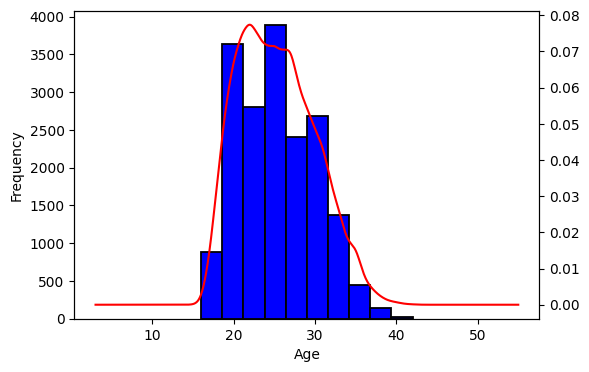

In [54]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

p_fifa_df.age.plot.hist(ax=ax,bins=10,color="blue",edgecolor="black",linewidth=1.3)
p_fifa_df.age.plot.density(ax=ax,secondary_y=True,color="red")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

plt.savefig("test.png",dpi=400)

Este bloque de código genera un histograma de la distribución de edades de los jugadores en el DataFrame `p_fifa_df` utilizando Seaborn y Matplotlib.

- `fig, ax = plt.subplots(1, 1, figsize=(6, 4))`: Crea una figura y un eje con un tamaño de 6x4 pulgadas.
- `sns.histplot(p_fifa_df.age, bins=10, ax=ax, color="blue")`: Dibuja un histograma de la columna `age` (edad) con 10 intervalos (bins) y color azul.
- `ax.set_xlabel("Age")` y `ax.set_ylabel("Frequency")`: Etiquetan los ejes X e Y respectivamente.

Esta visualización permite observar la frecuencia de las diferentes edades de los jugadores en el conjunto de datos FIFA 2020.

Text(0, 0.5, 'Frequency')

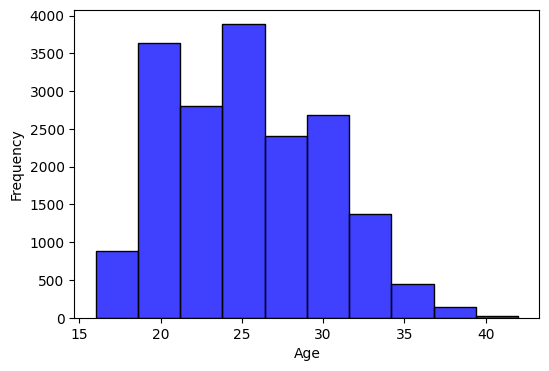

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# sns.histplot() es una función de Seaborn que se utiliza para crear histogramas
sns.histplot(
    p_fifa_df.age,
    bins=10,
    ax=ax,
    color="blue"
)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

Este bloque de código genera un diagrama de caja (boxplot) para visualizar la distribución de la altura de los jugadores (`height_cm`) en el DataFrame `p_fifa_df` utilizando Seaborn y Matplotlib.

- `fig, ax = plt.subplots(1, 1, figsize=(6, 4))`: Crea una figura y un eje con un tamaño de 6x4 pulgadas.
- `sns.boxplot(x=p_fifa_df.height_cm, color="g")`: Dibuja un boxplot de la columna `height_cm` (altura en centímetros) con color verde.
- `ax.set_xlabel("Height (cm)")`: Etiqueta el eje X como "Height (cm)".

El boxplot permite identificar la mediana, los cuartiles y posibles valores atípicos en la altura de los jugadores.

Text(0.5, 0, 'Height (cm)')

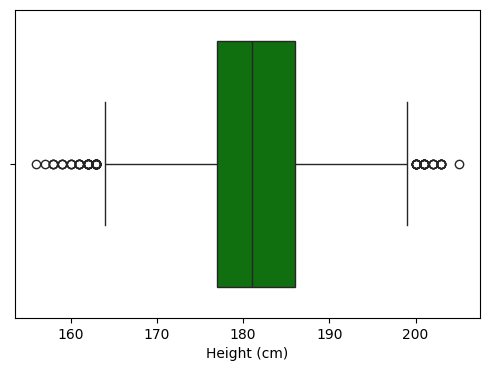

In [57]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

sns.boxplot(
    x=p_fifa_df.height_cm,
    color="g"
)

ax.set_xlabel("Height (cm)")

Este bloque de código genera un gráfico de pares (pairplot) utilizando Seaborn para visualizar la relación entre la altura (`height_cm`) y el peso (`weight_kg`) de los jugadores en el DataFrame `p_fifa_df`.

- `sns.pairplot(...)`: Crea una matriz de gráficos que muestra las relaciones entre las variables seleccionadas.
- `p_fifa_df[["height_cm", "weight_kg"]]`: Selecciona solo las columnas de altura y peso del DataFrame.
- `kind="reg"`: Dibuja una línea de regresión en los gráficos de dispersión para mostrar la tendencia entre las variables.
- `diag_kind="hist"`: Muestra histogramas en la diagonal para visualizar la distribución individual de cada variable.
- `diag_kws={...}`: Personaliza los histogramas de la diagonal con color rojo, bordes negros y transparencia (`alpha`).
- `height=3`: Define el tamaño de cada subgráfico en la matriz.

Este tipo de visualización es útil para analizar la correlación y la distribución conjunta de las variables numéricas seleccionadas.

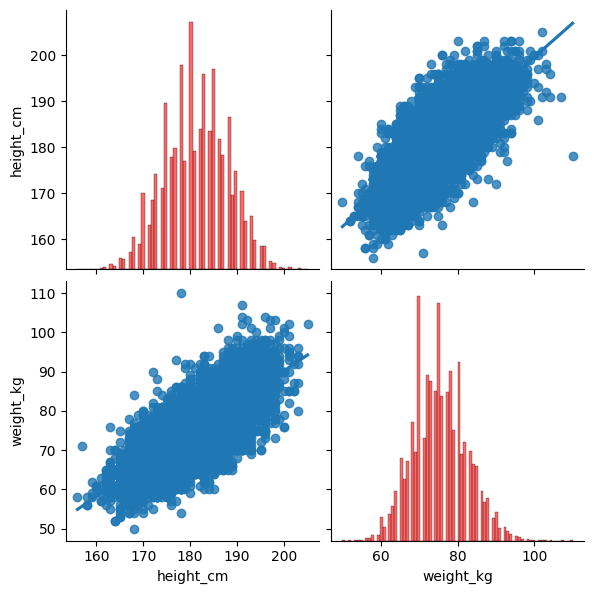

In [58]:
sns.pairplot(
    p_fifa_df[["height_cm", "weight_kg"]],
    kind="reg",
    diag_kind="hist",
    diag_kws={
        "color": "r",
        "edgecolor": "k",
        "alpha": 0.6
    },
    height=3
)